# Basal body spacing measurement within rows using intensity profile peak detection
This code quantifies the spacing between adjacent basal bodies (BBs) within individual ciliary rows of Paramecium cells, using intensity profiles extracted from the Poly-E channel in ImageJ. For each cell, measurments of five central rows are imported. Intensity profiles are smoothed with a Gaussian filter, and peaks corresponding to BB positions are detected using the SciPy find_peaks function. The distances between consecutive peaks represent the spacing between adjacent BBs. These distances are scaled to microns using the pixel size and expansion factor (when analyzing expanded cells).

Input:
- CSV files containing intensity profiles for five ciliary rows (exported from ImageJ).
- Parameters for peak detection (height and distance thresholds) and smoothing.
- Pixel size and expansion factor for scaling distances.

Output:
- CSV files containing the distances between adjacent BBs for each row.
- A CSV file with the mean BB spacing for each row.
- A text file documenting the peak detection parameters used.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

In [106]:
path = 'W:/Users/Daphne/WT_RESULTS/WT_ExM_Centrin/Zone analysis/BB measurements cell 11/Zone 2/'
im1 = np.genfromtxt(path + 'Plot Values row 1.csv', delimiter=",")
im2 = np.genfromtxt(path + 'Plot Values row 2.csv', delimiter=",")
im3 = np.genfromtxt(path + 'Plot Values row 3.csv', delimiter=",")
im4 = np.genfromtxt(path + 'Plot Values row 4.csv', delimiter=",")
im5 = np.genfromtxt(path + 'Plot Values row 5.csv', delimiter=",")

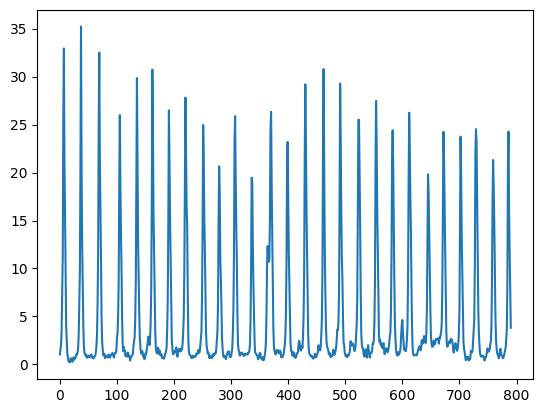

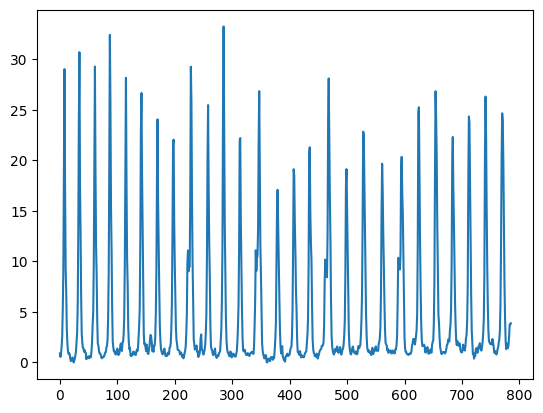

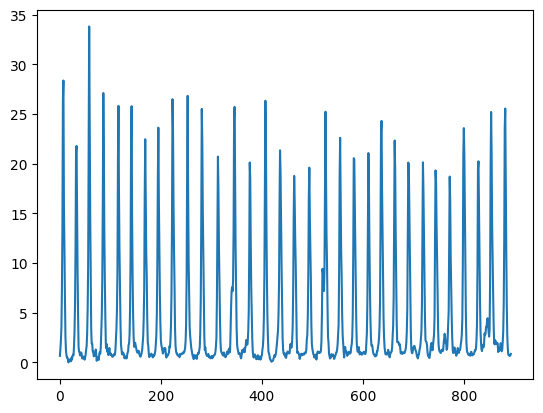

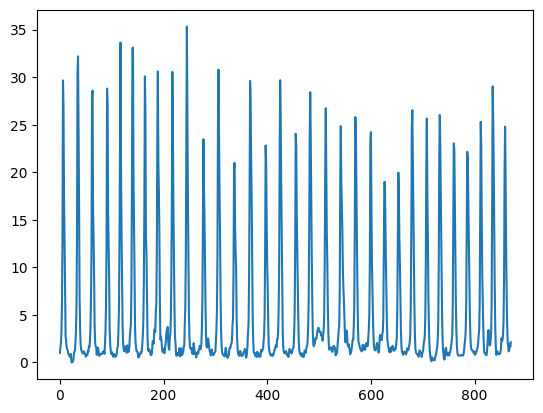

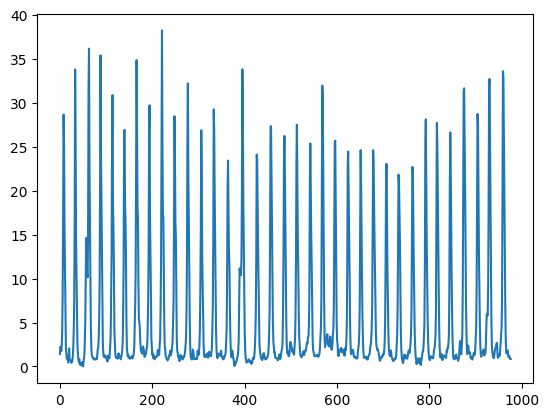

In [107]:
im1 = im1[1:]
im2 = im2[1:]
im3 = im3[1:]
im4 = im4[1:]
im5 = im5[1:]

plt.plot(im1[:, 0], im1[:, 1])
plt.show()
plt.plot(im2[:, 0], im2[:, 1])
plt.show()
plt.plot(im3[:, 0], im3[:, 1])
plt.show()
plt.plot(im4[:, 0], im4[:, 1])
plt.show()
plt.plot(im5[:, 0], im5[:, 1])
plt.show()

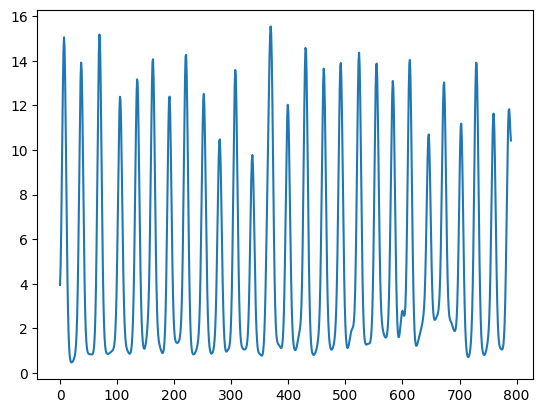

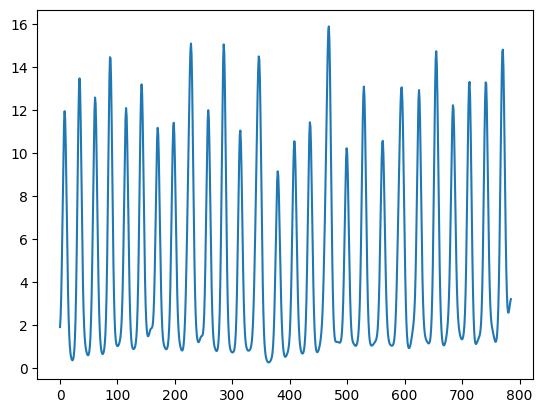

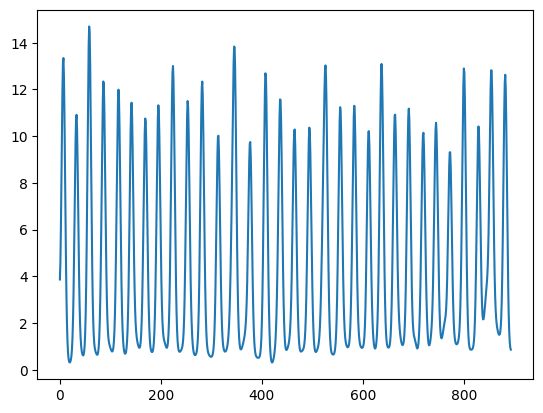

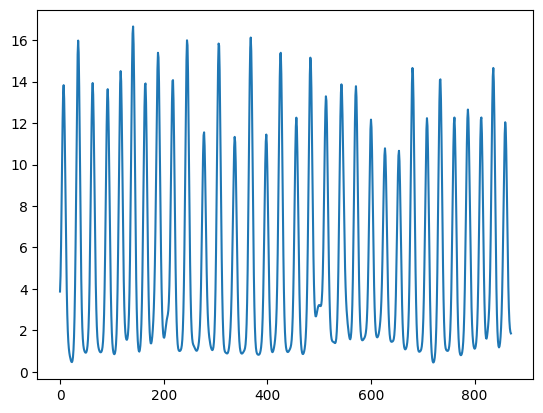

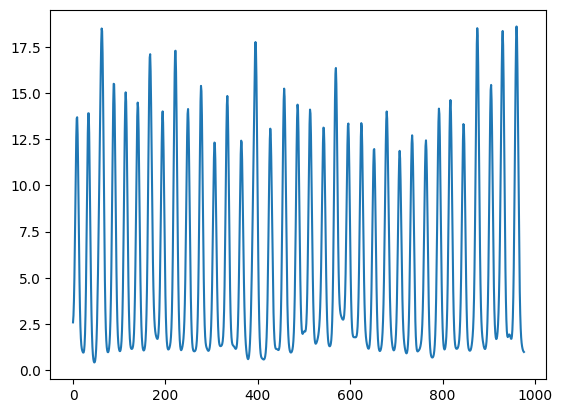

In [108]:
# Apply Gaussian filter to smooth the data --> dont do it when detecting doublets as well!
smoothed_im1 = gaussian_filter1d(im1[:, 1], sigma=3)
smoothed_im2 = gaussian_filter1d(im2[:, 1], sigma=3)
smoothed_im3 = gaussian_filter1d(im3[:, 1], sigma=3)
smoothed_im4 = gaussian_filter1d(im4[:, 1], sigma=3)
smoothed_im5 = gaussian_filter1d(im5[:, 1], sigma=3)

# Plot the smoothed data
plt.plot(im1[:, 0], smoothed_im1)
plt.show()
plt.plot(im2[:, 0], smoothed_im2)
plt.show()
plt.plot(im3[:, 0], smoothed_im3)
plt.show()
plt.plot(im4[:, 0], smoothed_im4)
plt.show()
plt.plot(im5[:, 0], smoothed_im5)
plt.show()

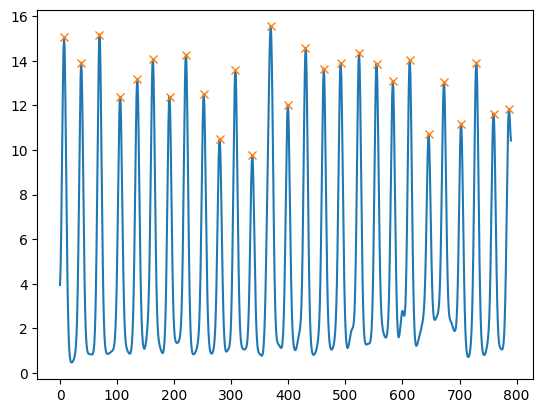

[  7  37  69 105 135 163 192 221 252 280 307 337 369 399 430 462 492 524
 555 583 613 646 673 703 729 760 787]
[30 32 36 30 28 29 29 31 28 27 30 32 30 31 32 30 32 31 28 30 33 27 30 26
 31 27]
30.0


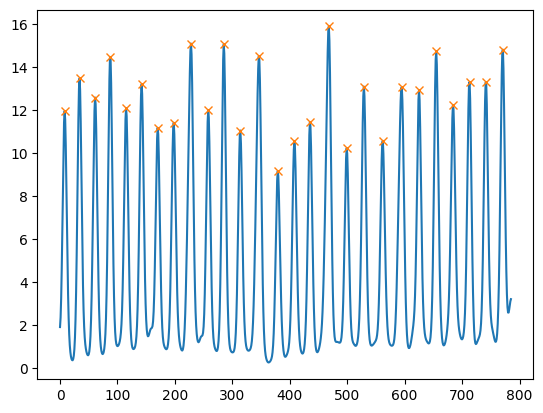

[  8  34  61  87 115 142 170 198 228 258 285 314 346 379 408 435 468 499
 529 562 595 625 655 684 713 741 771]
[26 27 26 28 27 28 28 30 30 27 29 32 33 29 27 33 31 30 33 33 30 30 29 29
 28 30]
29.346153846153847


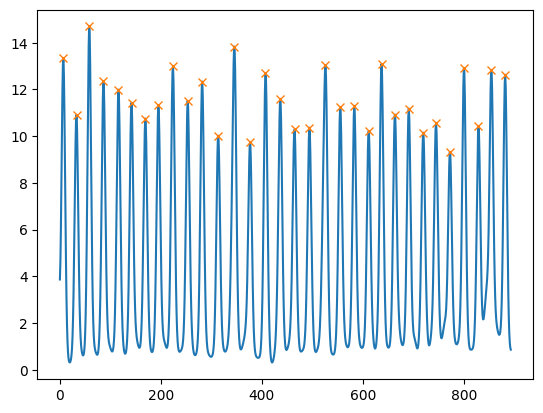

[  7  33  58  86 116 142 169 195 224 253 282 314 345 377 407 436 465 494
 526 555 583 612 637 664 691 720 745 772 800 829 854 882]
[26 25 28 30 26 27 26 29 29 29 32 31 32 30 29 29 29 32 29 28 29 25 27 27
 29 25 27 28 29 25 28]
28.225806451612904


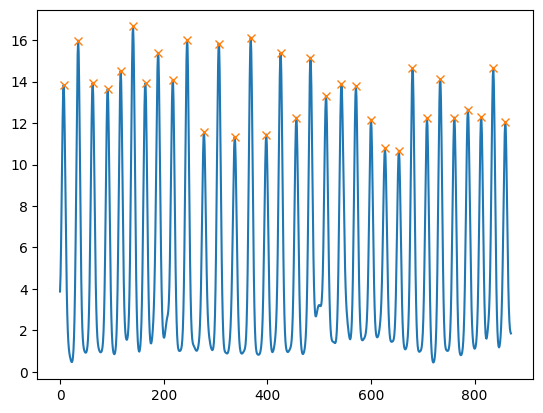

[  7  35  63  92 117 141 165 189 218 245 278 306 337 368 398 426 456 483
 513 543 571 600 627 654 680 708 734 761 787 813 836 859]
[28 28 29 25 24 24 24 29 27 33 28 31 31 30 28 30 27 30 30 28 29 27 27 26
 28 26 27 26 26 23 23]
27.483870967741936


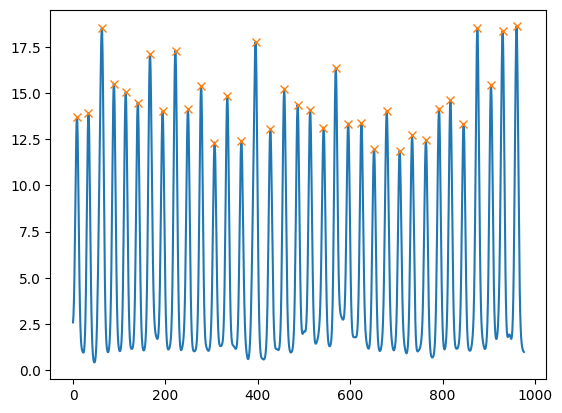

[  9  33  62  88 114 140 167 194 222 249 277 306 334 364 395 427 457 486
 513 542 569 596 624 652 679 707 734 764 792 817 845 875 905 930 960]
[24 29 26 26 26 27 27 28 27 28 29 28 30 31 32 30 29 27 29 27 27 28 28 27
 28 27 30 28 25 28 30 30 25 30]
27.970588235294116


In [109]:
x1 = smoothed_im1[:]
x2 = smoothed_im2[:]
x3 = smoothed_im3[:]
x4 = smoothed_im4[:]
x5 = smoothed_im5[:]
# x1=im1[:,1]
# x2=im2[:,1]
# x3=im3[:,1]
# x4=im4[:,1]
# x5=im5[:,1]

peaks1, _ = find_peaks(x1, height=2, distance=15)
plt.plot(x1)
plt.plot(peaks1, x1[peaks1], "x")
plt.show()
print(peaks1)
print(np.diff(peaks1))
print(np.mean(np.diff(peaks1)))

peaks2, _ = find_peaks(x2, height=2, distance=15)
plt.plot(x2)
plt.plot(peaks2, x2[peaks2], "x")
plt.show()
print(peaks2)
print(np.diff(peaks2))
print(np.mean(np.diff(peaks2)))

peaks3, _ = find_peaks(x3, height=2, distance=15)
plt.plot(x3)
plt.plot(peaks3, x3[peaks3], "x")
plt.show()
print(peaks3)
print(np.diff(peaks3))
print(np.mean(np.diff(peaks3)))

peaks4, _ = find_peaks(x4, height=2, distance=15)
plt.plot(x4)
plt.plot(peaks4, x4[peaks4], "x")
plt.show()
print(peaks4)
print(np.diff(peaks4))
print(np.mean(np.diff(peaks4)))

peaks5, _ = find_peaks(x5, height=2, distance=15)
plt.plot(x5)
plt.plot(peaks5, x5[peaks5], "x")
plt.show()
print(peaks5)
print(np.diff(peaks5))
print(np.mean(np.diff(peaks5)))

In [110]:
# Save the parameters for the peak detection to a text file
with open(path + 'BB_peakdetection_parameters.txt', 'w') as f:
    f.write('smoothing with Gaussian filter, sigma=3\n')
    f.write('height=2, distance=15 for row 1\n')
    f.write('height=2, distance=15 for row 2\n')
    f.write('height=2, distance=15 for row 3\n')
    f.write('height=2, distance=15 for row 4\n')
    f.write('height=2, distance=15 for row 5\n')

In [111]:
# scaling (ExM WT)
pixelsize = 0.2866 # microns/pixel
# expansion_factor = 1/4.36 # 1/expansion factor   2024
expansion_factor = 1/4.23 # 1/expansion factor  2025

peaks1 = peaks1*pixelsize*expansion_factor
peaks2 = peaks2*pixelsize*expansion_factor
peaks3 = peaks3*pixelsize*expansion_factor
peaks4 = peaks4*pixelsize*expansion_factor
peaks5 = peaks5*pixelsize*expansion_factor

# Save np.diff(peaks1) values to a numpy array and then save as a csv file
np.savetxt(path + 'Plot Values 1_BBdistances_scaled.csv', np.diff(peaks1), delimiter=',')
np.savetxt(path + 'Plot Values 2_BBdistances_scaled.csv', np.diff(peaks2), delimiter=',')
np.savetxt(path + 'Plot Values 3_BBdistances_scaled.csv', np.diff(peaks3), delimiter=',')
np.savetxt(path + 'Plot Values 4_BBdistances_scaled.csv', np.diff(peaks4), delimiter=',')
np.savetxt(path + 'Plot Values 5_BBdistances_scaled.csv', np.diff(peaks5), delimiter=',')

# save np.mean(np.diff(peaks)) values for each row to a numpy array and then save as a csv file
mean_distances = np.array([np.mean(np.diff(peaks1)), np.mean(np.diff(peaks2)), np.mean(np.diff(peaks3)), np.mean(np.diff(peaks4)), np.mean(np.diff(peaks5))])
np.savetxt(path + 'BB_meandistances_withinrows_scaled.csv', mean_distances, delimiter=',')
